In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('data/house Prediction Data Set.csv', sep='\\s+', header=None)

In [34]:
df.shape

(506, 14)

In [35]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [36]:
df.columns = [
    'CRIM','ZN','INDUS','CHAS','NOX','RM','AGE',
    'DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'
]

In [37]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## This dataset resembles the famous boston dataset
- CRIM	    Crime rate per person in the town
- ZN	        % of residential land with large houses (big plots over 25,000 sq.ft.)
- INDUS	    % of land used for businesses (non-shops, like factories)
- CHAS	    Is it next to the Charles River? (1 = yes, 0 = no)
- NOX	    Air pollution level (nitric oxides)
- RM	        Average number of rooms in houses
- AGE	    % of houses built before 1940
- DIS	    Distance to job centers (weighted)
- RAD	    How easy it is to get to main highways
- TAX	    Property tax rate per $10,000 value
- PTRATIO	Average number of students per teacher in schools
- B	        A calculation related to the proportion of Black residents (1000 × (Bk − 0.63)²)
- LSTAT	    % of people with lower income or status
- MEDV	    Median (middle) house price in $1,000’s — this is the thing we usually predict


In [38]:
df.corr()['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [39]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

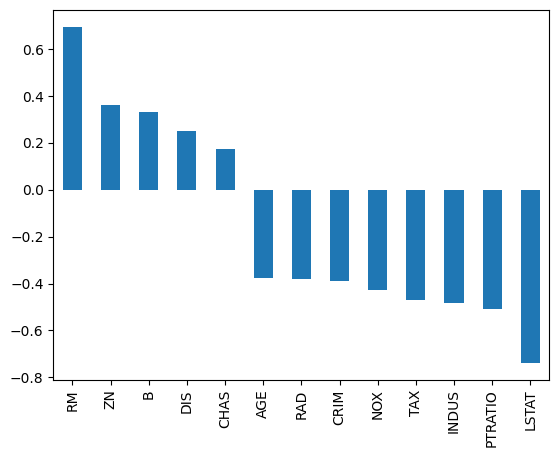

In [40]:
corr_medv = df.corr()['MEDV'].sort_values(ascending=False)
corr_medv.drop('MEDV').plot(kind='bar')

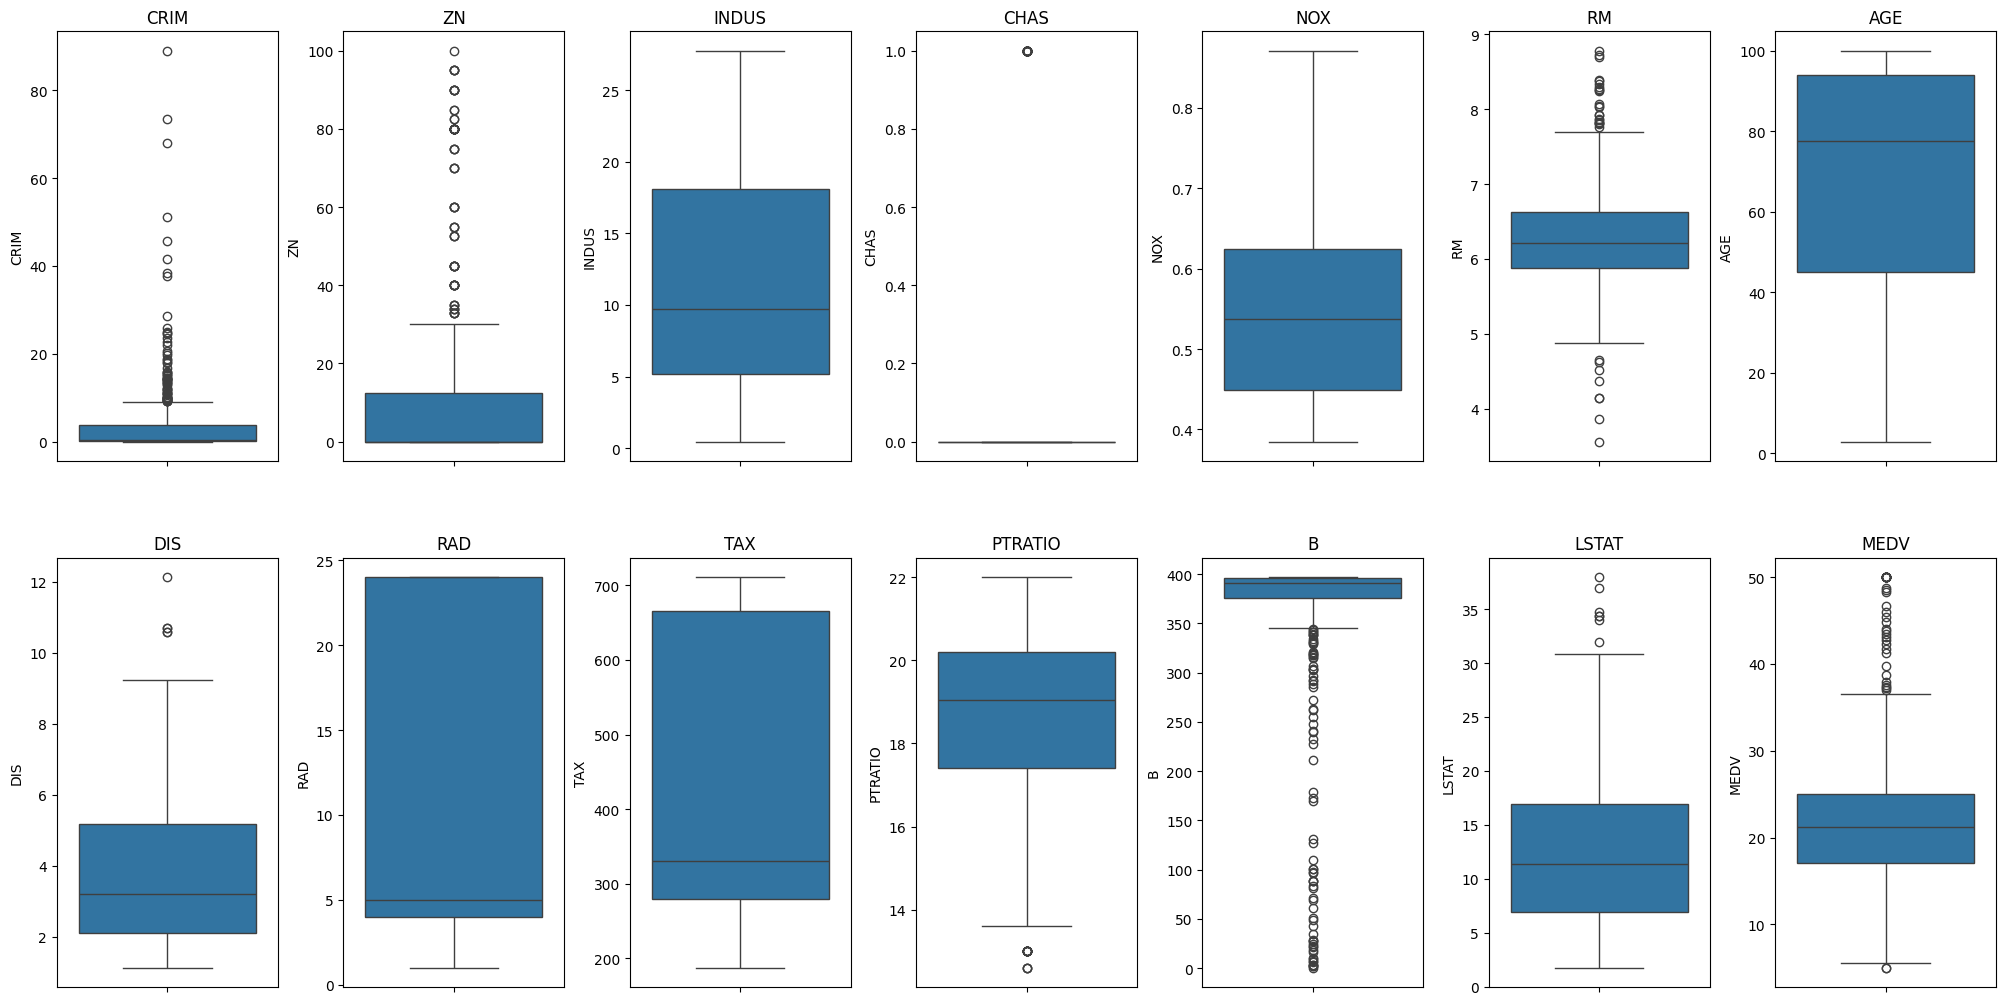

In [41]:
fig, axes = plt.subplots(2, 7, figsize=(20, 10))
axes = axes.flatten()

cols = df.columns

for i, val in enumerate(cols):
    sns.boxplot(y=df[val], ax=axes[i])
    axes[i].set_title(val)

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5)
plt.show()


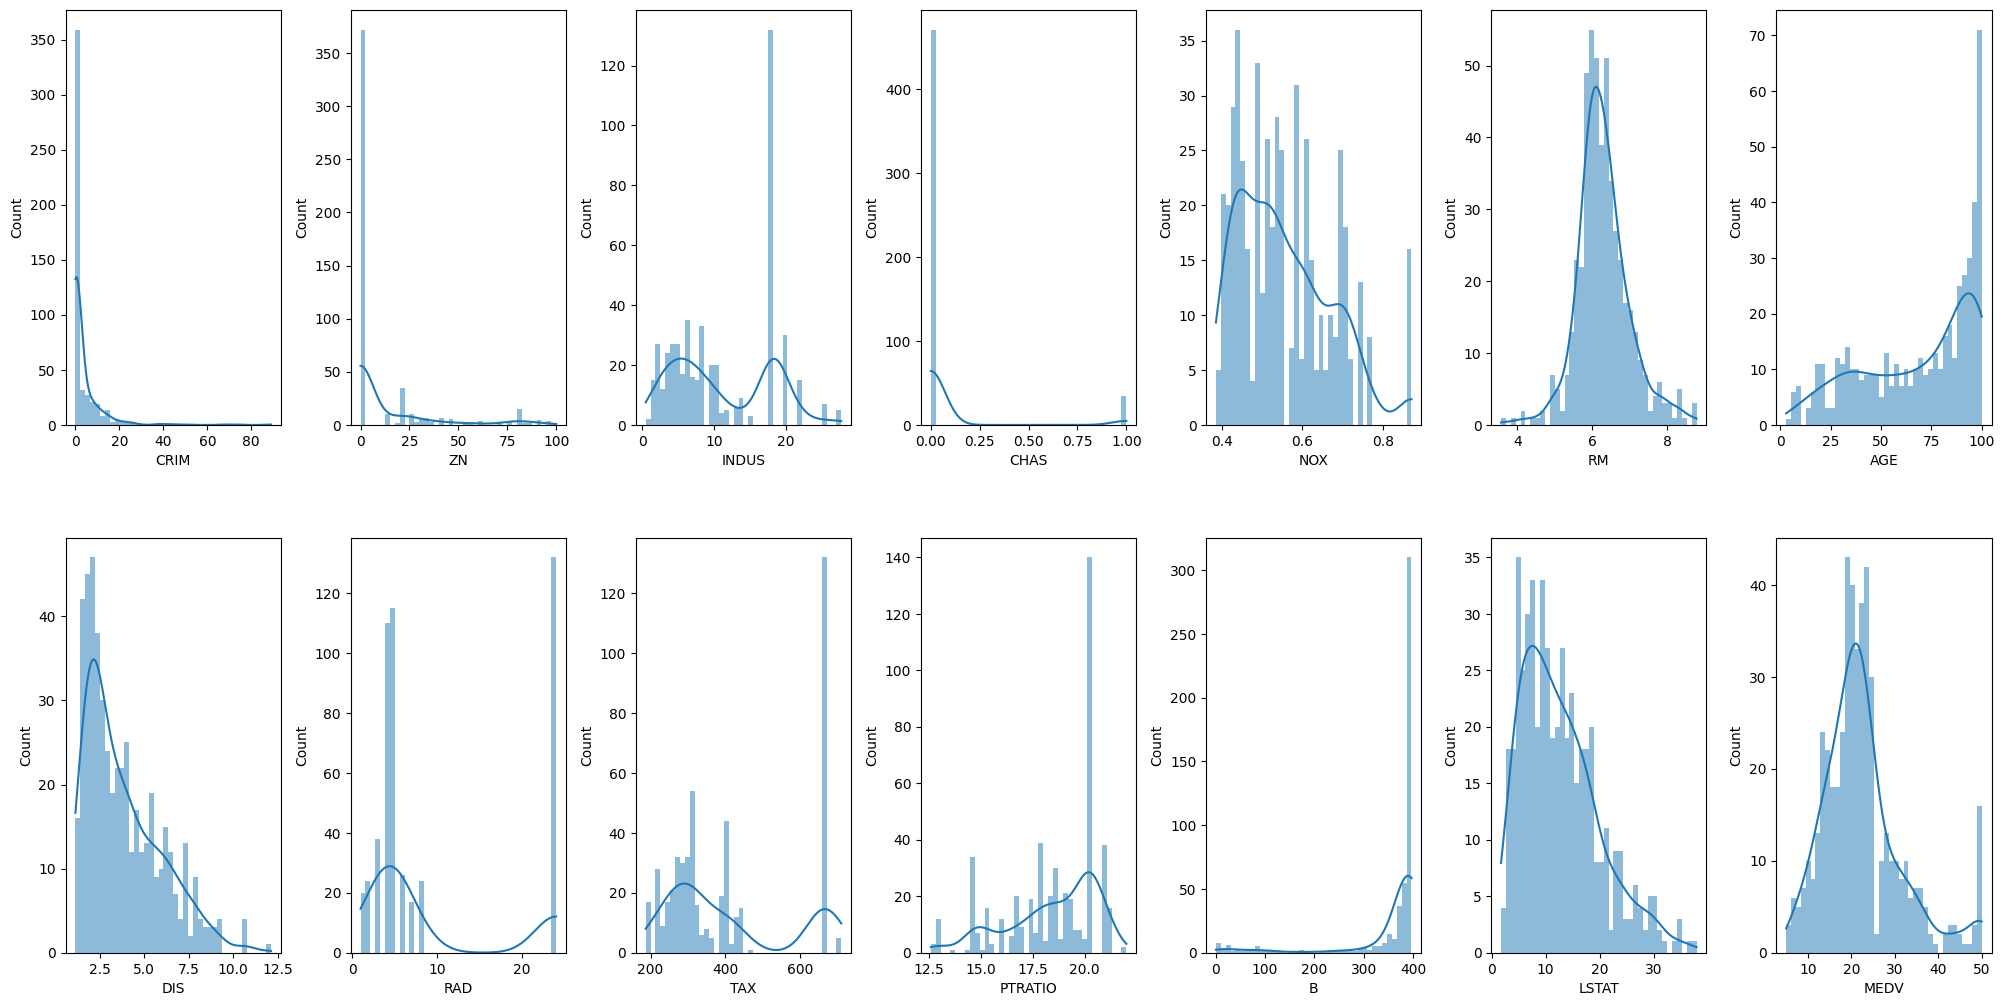

In [42]:
fig, axes = plt.subplots(2, 7, figsize=(20, 10)) 
axes = axes.flatten()

cols = df.columns

for i, val in enumerate(cols):
    sns.histplot(df[val], bins=40,kde=True, edgecolor='None', ax = axes[i])

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5)
plt.show()

From the histplot we can see that 'crim','zn','b' are skewed and then 'tax' has a very high range

In [43]:
from scipy.stats import boxcox
cols_for_boxcox = ['CRIM','ZN','TAX']

for col in cols_for_boxcox:
    df[col] = df[col] + 0.001
    df[col], fitted_lambda = boxcox(df[col])

- log1p - log(1+x) to avoid log0 and has to be +ve
- boxcox has to be strictly +ve
- yeo-johnson works for +ve and -ve

For now best is boxcox as all values are +ve

In [14]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-6.674624,1.898881,2.31,0,0.538,6.575,65.2,4.0900,1,1.807247,15.3,396.90,4.98,24.0
1,-4.436005,-24.721041,7.07,0,0.469,6.421,78.9,4.9671,2,1.796567,17.8,396.90,9.14,21.6
2,-4.437084,-24.721041,7.07,0,0.469,7.185,61.1,4.9671,2,1.796567,17.8,392.83,4.03,34.7
3,-4.187514,-24.721041,2.18,0,0.458,6.998,45.8,6.0622,3,1.791635,18.7,394.63,2.94,33.4
4,-3.125210,-24.721041,2.18,0,0.458,7.147,54.2,6.0622,3,1.791635,18.7,396.90,5.33,36.2


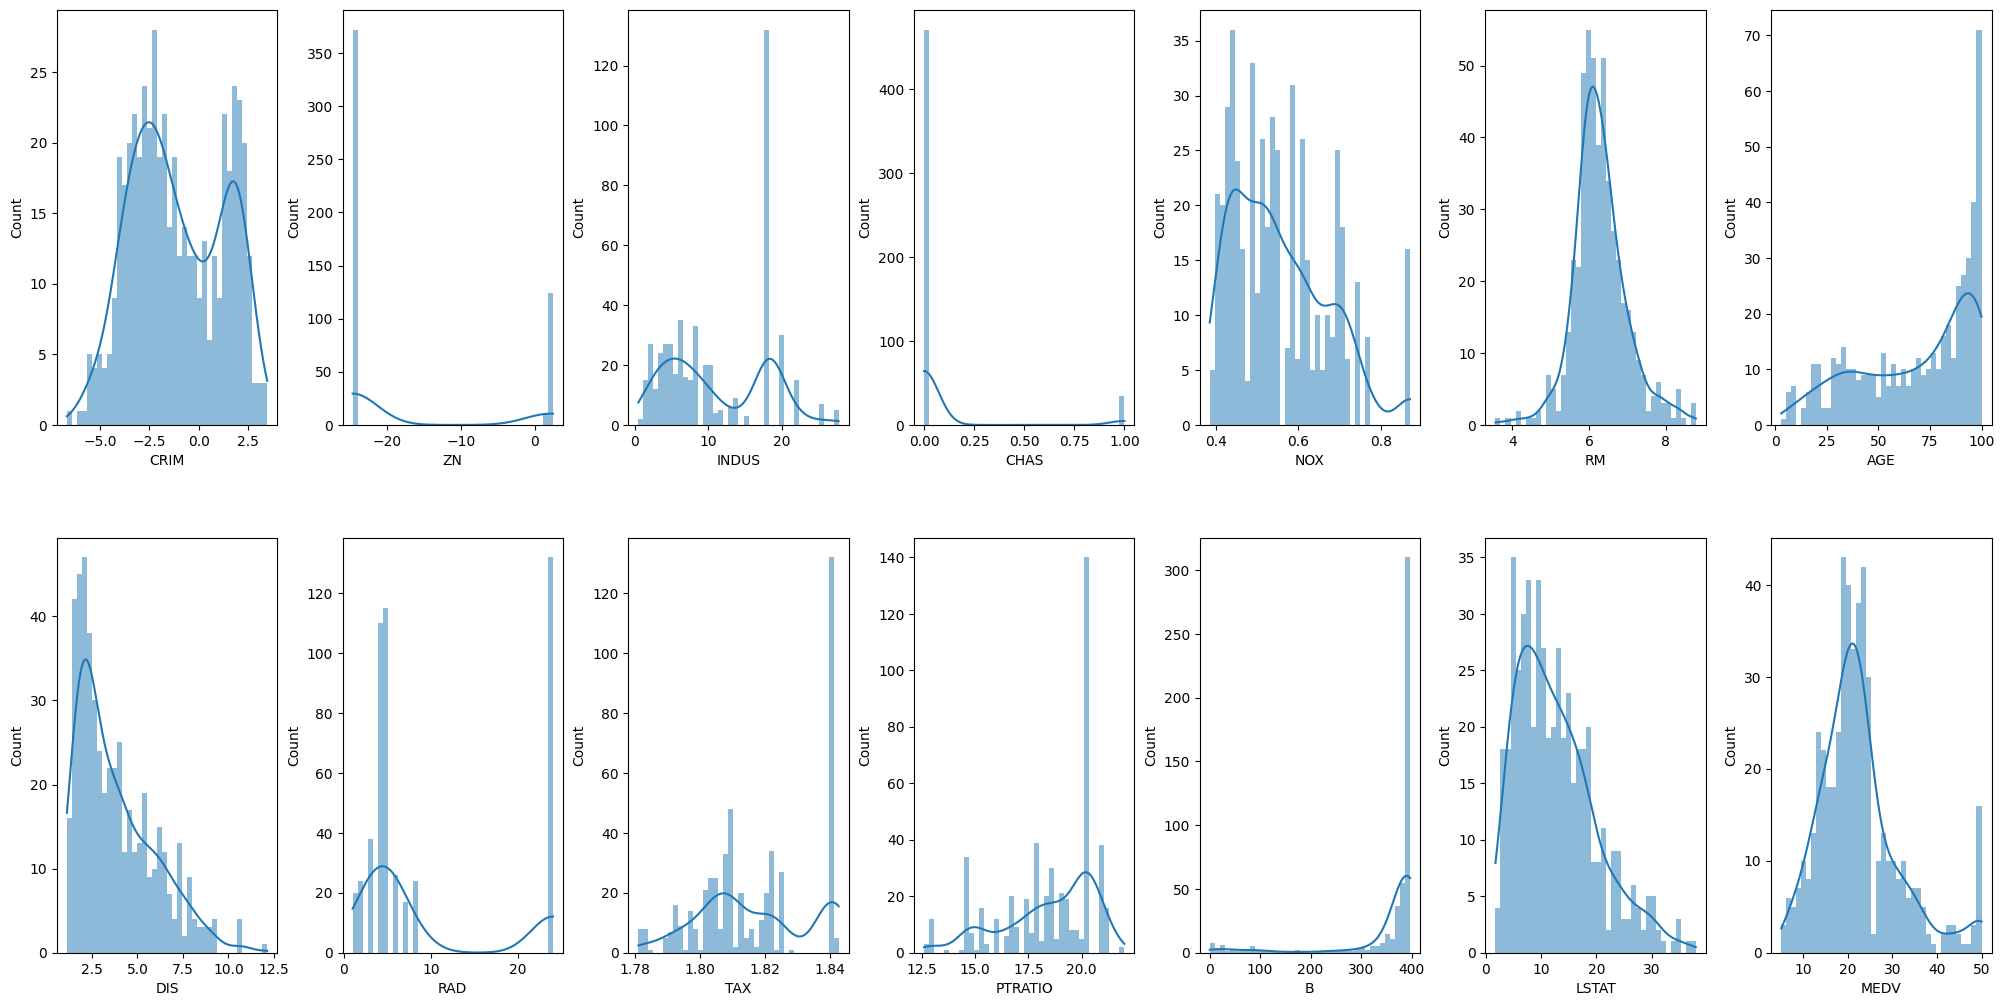

In [44]:
fig, axes = plt.subplots(2, 7, figsize=(20, 10)) 
axes = axes.flatten()

cols = df.columns

for i, val in enumerate(cols):
    sns.histplot(df[val], bins=40,kde=True, edgecolor='None', ax = axes[i])

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5)
plt.show()

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['B']] = scaler.fit_transform(df[['B']])

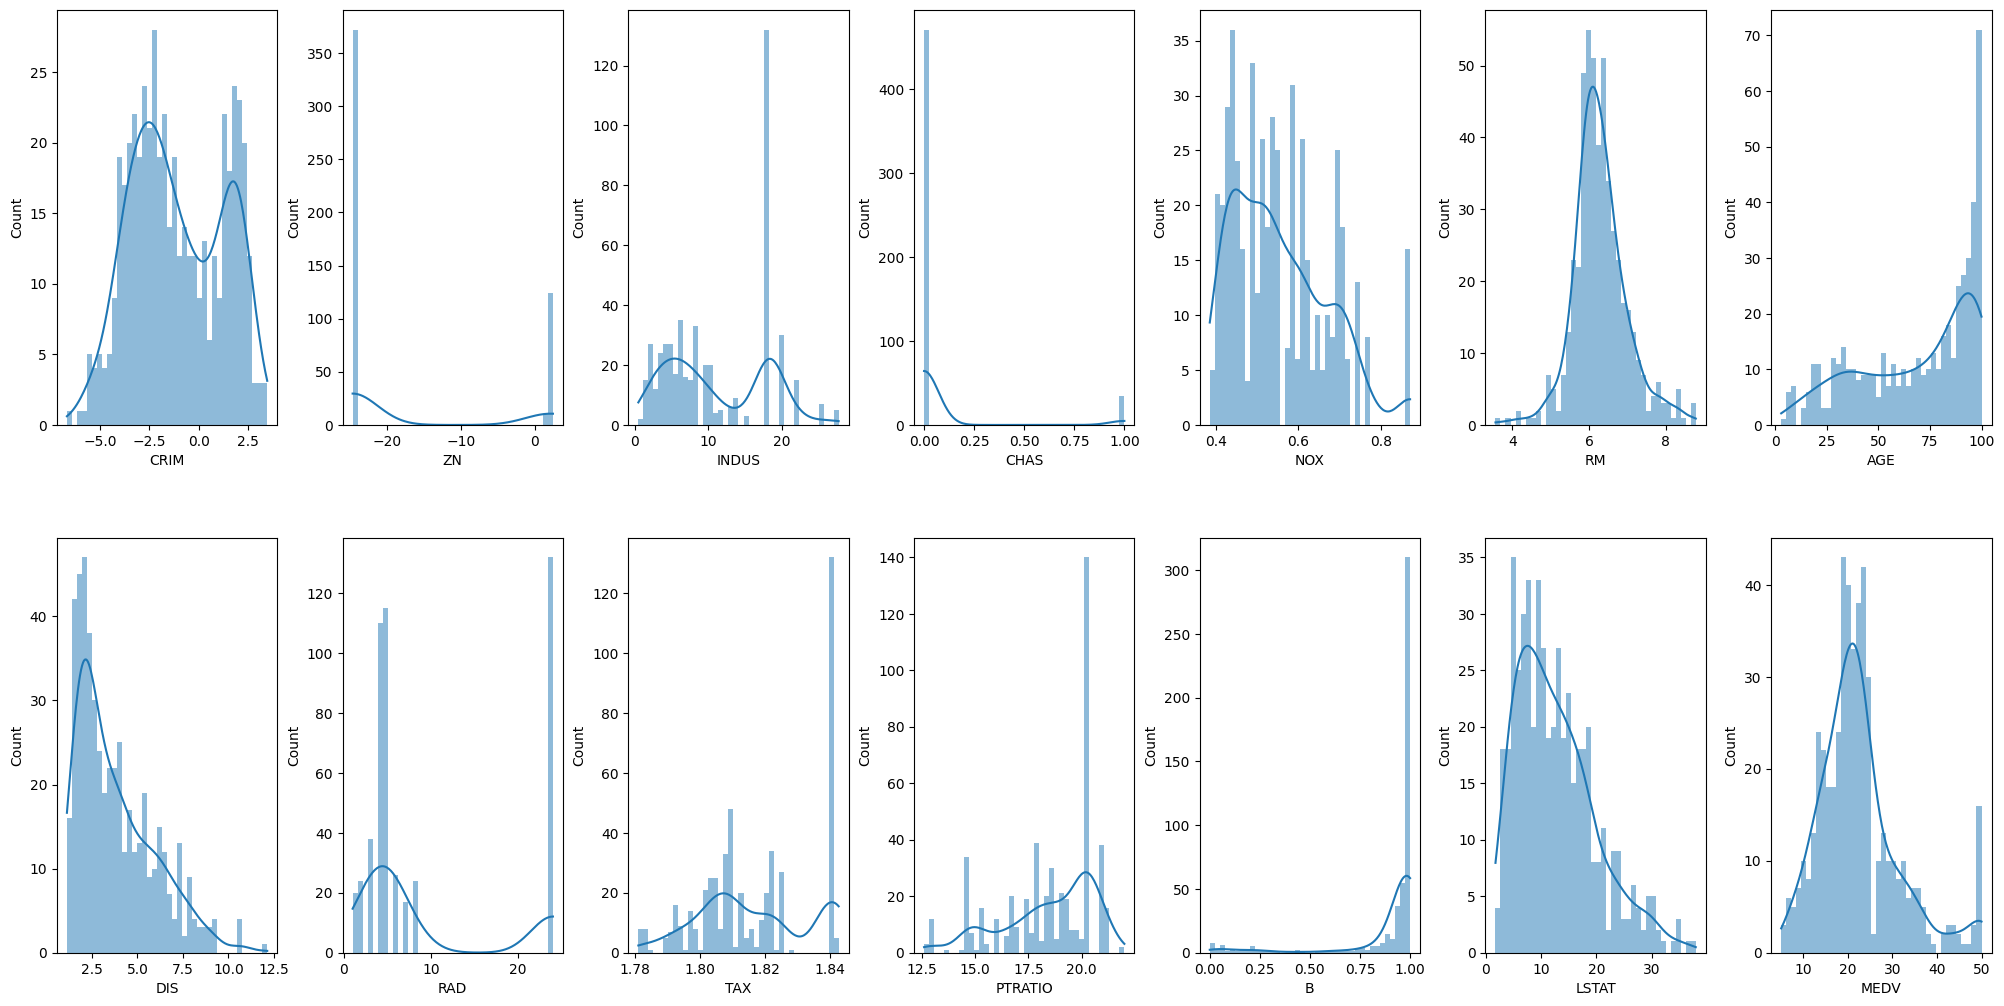

In [46]:
fig, axes = plt.subplots(2, 7, figsize=(20, 10)) 
axes = axes.flatten()

cols = df.columns

for i, val in enumerate(cols):
    sns.histplot(df[val], bins=40,kde=True, edgecolor='None', ax = axes[i])

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5)
plt.show()

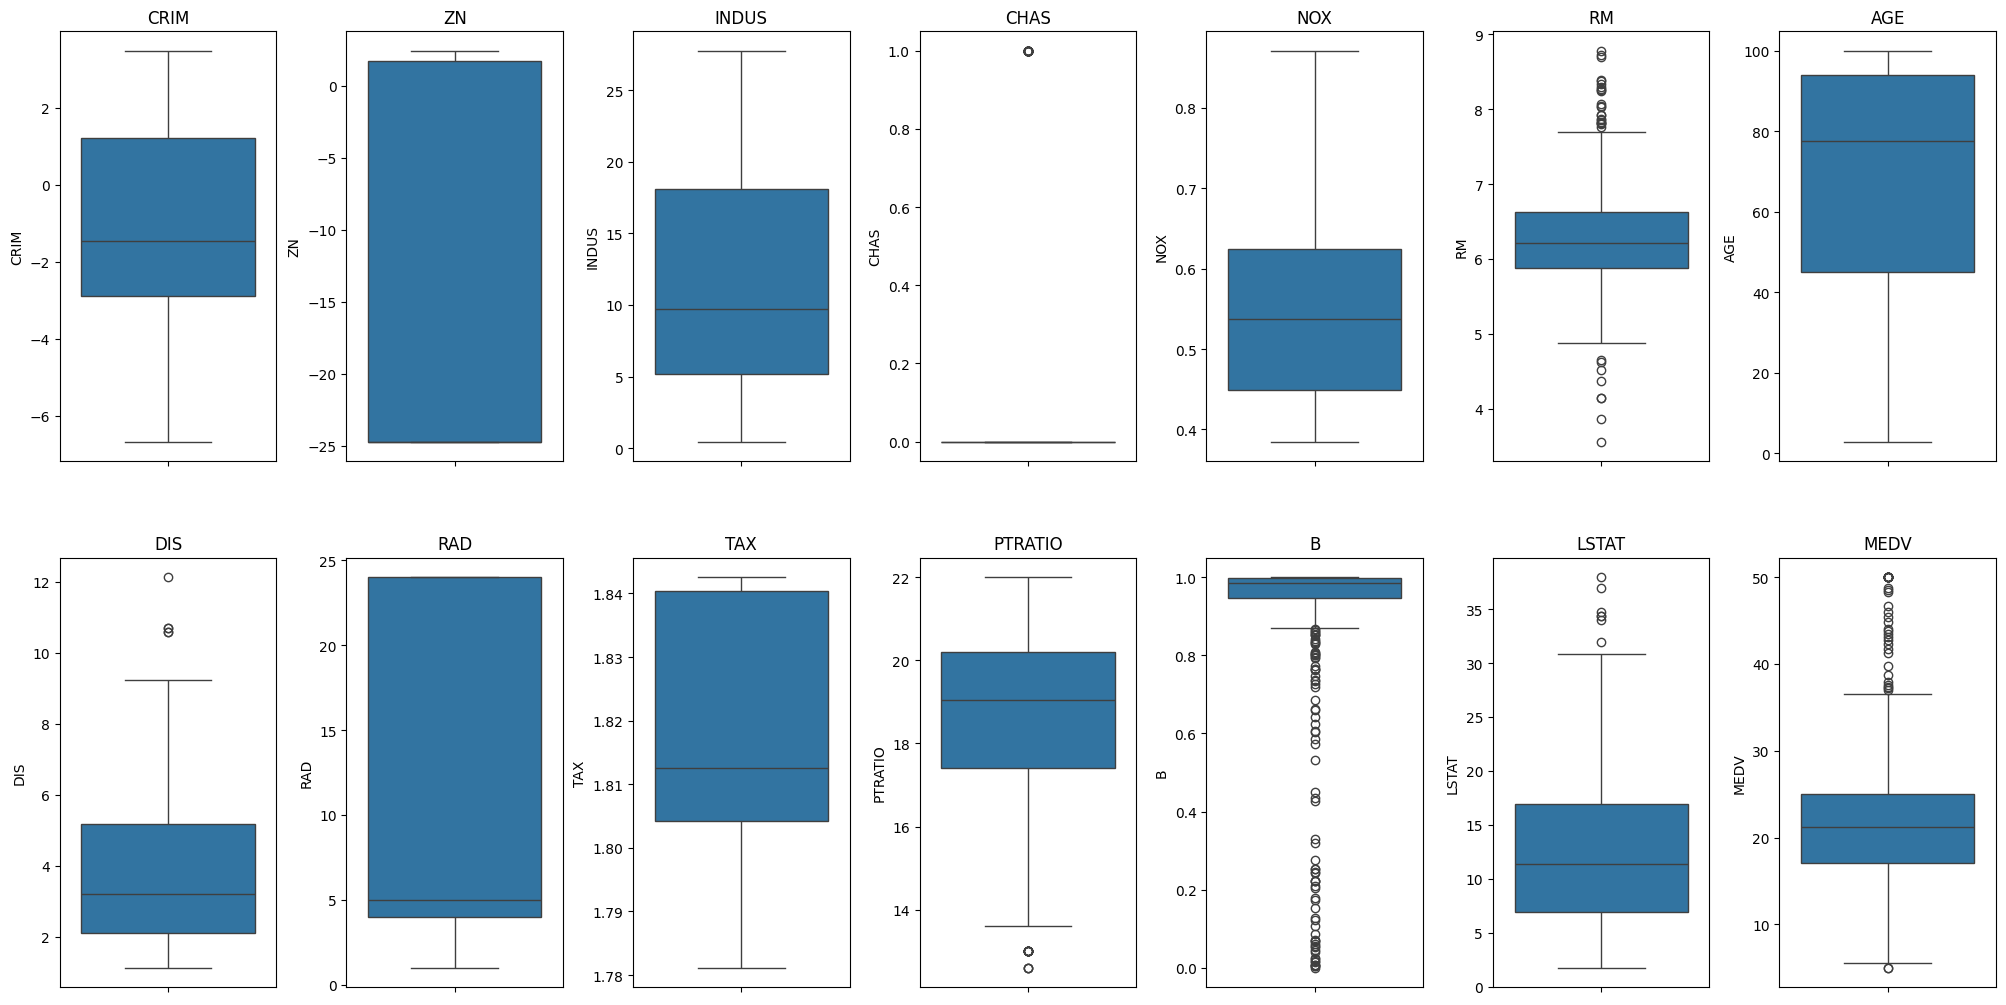

In [47]:
fig, axes = plt.subplots(2, 7, figsize=(20, 10))
axes = axes.flatten()

cols = df.columns

for i, val in enumerate(cols):
    sns.boxplot(y=df[val], ax=axes[i])
    axes[i].set_title(val)

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5)
plt.show()


In [20]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-2.430467,1.646968,2.31,0,0.538,6.575,65.2,4.0900,1,-0.556197,15.3,0.441052,4.98,24.0
1,-1.454501,-0.600156,7.07,0,0.469,6.421,78.9,4.9671,2,-1.175882,17.8,0.441052,9.14,21.6
2,-1.454971,-0.600156,7.07,0,0.469,7.185,61.1,4.9671,2,-1.175882,17.8,0.396427,4.03,34.7
3,-1.346167,-0.600156,2.18,0,0.458,6.998,45.8,6.0622,3,-1.461995,18.7,0.416163,2.94,33.4
4,-0.883036,-0.600156,2.18,0,0.458,7.147,54.2,6.0622,3,-1.461995,18.7,0.441052,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.940798,-0.600156,11.93,0,0.573,6.593,69.1,2.4786,1,-0.797200,21.0,0.387217,9.67,22.4
502,-1.137017,-0.600156,11.93,0,0.573,6.120,76.7,2.2875,1,-0.797200,21.0,0.441052,9.08,20.6
503,-0.958856,-0.600156,11.93,0,0.573,6.976,91.0,2.1675,1,-0.797200,21.0,0.441052,5.64,23.9
504,-0.617461,-0.600156,11.93,0,0.573,6.794,89.3,2.3889,1,-0.797200,21.0,0.403225,6.48,22.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [22]:
df.duplicated().sum()

np.int64(0)

In [48]:
df.to_csv('house_price_prediction/boston.csv', index=False)

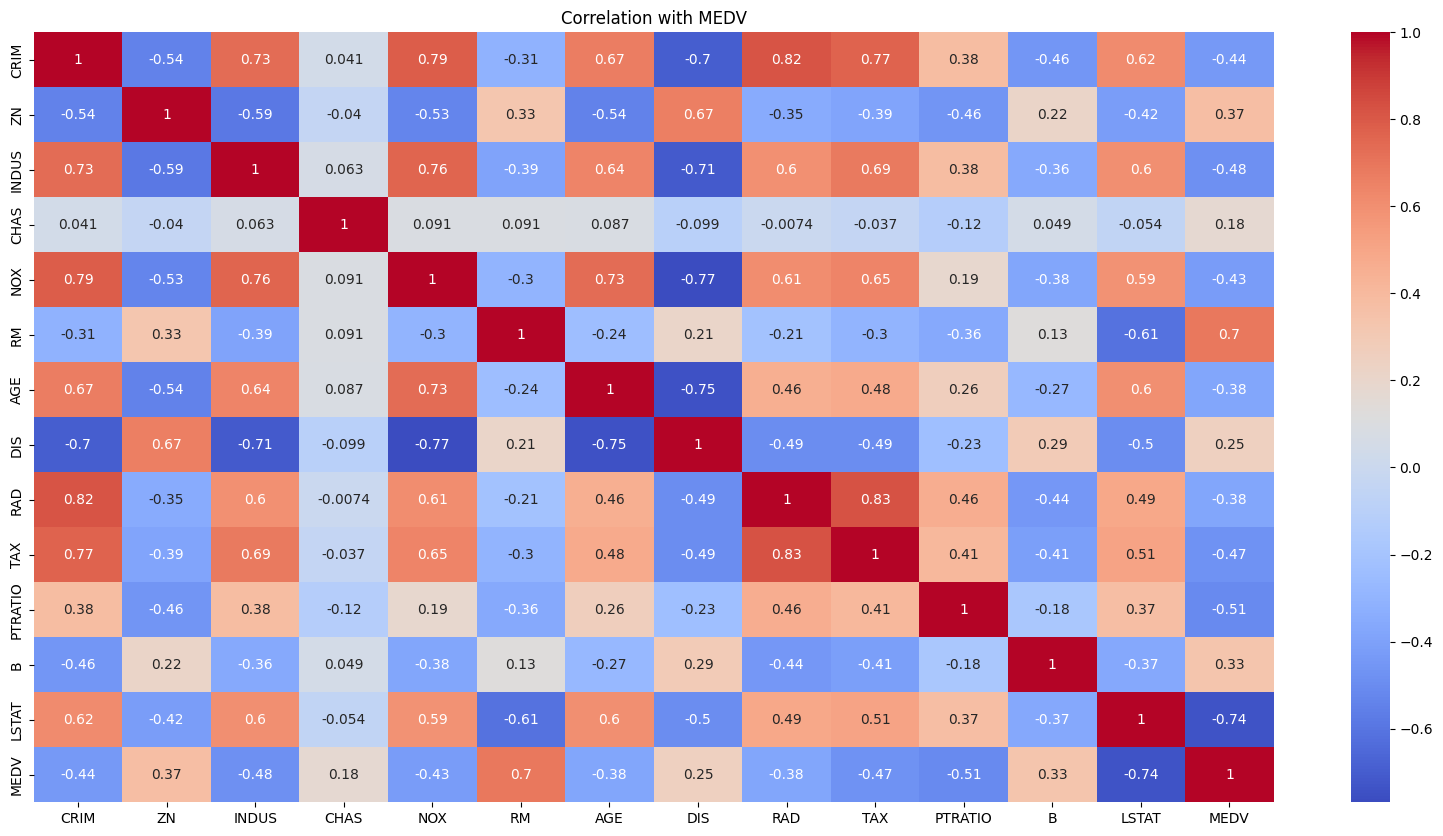

In [49]:
corr_medv = df.corr()['MEDV'].sort_values(ascending=False)

corr_df = corr_medv.to_frame()

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation with MEDV")
plt.show()

## Training

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df.drop(columns=['MEDV'])
y = df['MEDV']

X_Scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size=0.2, random_state=42)



In [56]:
pd.DataFrame(X_Scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-2.430467,1.646968,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.556197,-1.459000,0.441052,-1.075562
1,-1.454501,-0.600156,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-1.175882,-0.303094,0.441052,-0.492439
2,-1.454971,-0.600156,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-1.175882,-0.303094,0.396427,-1.208727
3,-1.346167,-0.600156,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.461995,0.113032,0.416163,-1.361517
4,-0.883036,-0.600156,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.461995,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.940798,-0.600156,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.797200,1.176466,0.387217,-0.418147
502,-1.137017,-0.600156,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.797200,1.176466,0.441052,-0.500850
503,-0.958856,-0.600156,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.797200,1.176466,0.441052,-0.983048
504,-0.617461,-0.600156,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.797200,1.176466,0.403225,-0.865302


In [55]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans

In [62]:
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, classification_report

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

lr_score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 Score: ", lr_score)

print("Mean Square error: ",mse)

R2 Score:  0.6595970850876656
Mean Square error:  24.963033549322994


In [67]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

knn_score = r2_score(y_test, y_pred_knn)
mse = mean_squared_error(y_test, y_pred_knn)

print("R2 Score: ", knn_score)
print("Mean Square error: ",mse)


R2 Score:  0.7504704610965739
Mean Square error:  18.29894509803922


In [69]:
k_values = [3, 5, 7, 9, 11]
result = {}

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred_knn = knn.predict(X_test)

    knn_score = r2_score(y_test, y_pred_knn)
    mse = mean_squared_error(y_test, y_pred_knn)

    result[k] = {'MSE': mse, 'R2': knn_score}

for i, r in result.items():

    print("R2 Score: ", {r['R2']})
    print("Mean Square error: ",{r['MSE']})

R2 Score:  {0.7754217578372479}
Mean Square error:  {16.469172113289762}
R2 Score:  {0.7504704610965739}
Mean Square error:  {18.29894509803922}
R2 Score:  {0.7081851360593596}
Mean Square error:  {21.39988795518207}
R2 Score:  {0.6880316719830916}
Mean Square error:  {22.87781771968047}
R2 Score:  {0.6775965217530513}
Mean Square error:  {23.64306676389564}


In [76]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

median = y.median()

y_binary = (y > median).astype(int)

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_Scaled, y_binary, test_size=0.2, random_state=42)


In [77]:
y_binary.value_counts()

MEDV
0    256
1    250
Name: count, dtype: int64

In [78]:
log = LogisticRegression(random_state=42)
log.fit(X_train_log, y_train_log)

y_pred_log = log.predict(X_test_log)

accuracy = accuracy_score(y_test_log, y_pred_log)
conf_matrix = confusion_matrix(y_test_log, y_pred_log)
class_report = classification_report(y_test_log, y_pred_log)

print("Accuracy Score: ", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy Score:  0.8627450980392157

Confusion Matrix:
 [[53  7]
 [ 7 35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        60
           1       0.83      0.83      0.83        42

    accuracy                           0.86       102
   macro avg       0.86      0.86      0.86       102
weighted avg       0.86      0.86      0.86       102



In [90]:
dt = DecisionTreeRegressor(random_state=42, max_depth=5)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

mse = mean_squared_error(y_test, y_pred_dt)
r2 = r2_score(y_test, y_pred_dt)

print("R² Score: ", r2)
print("Mean Squared Error: ", mse)

R² Score:  0.8833565347917995
Mean Squared Error:  8.553906584646844


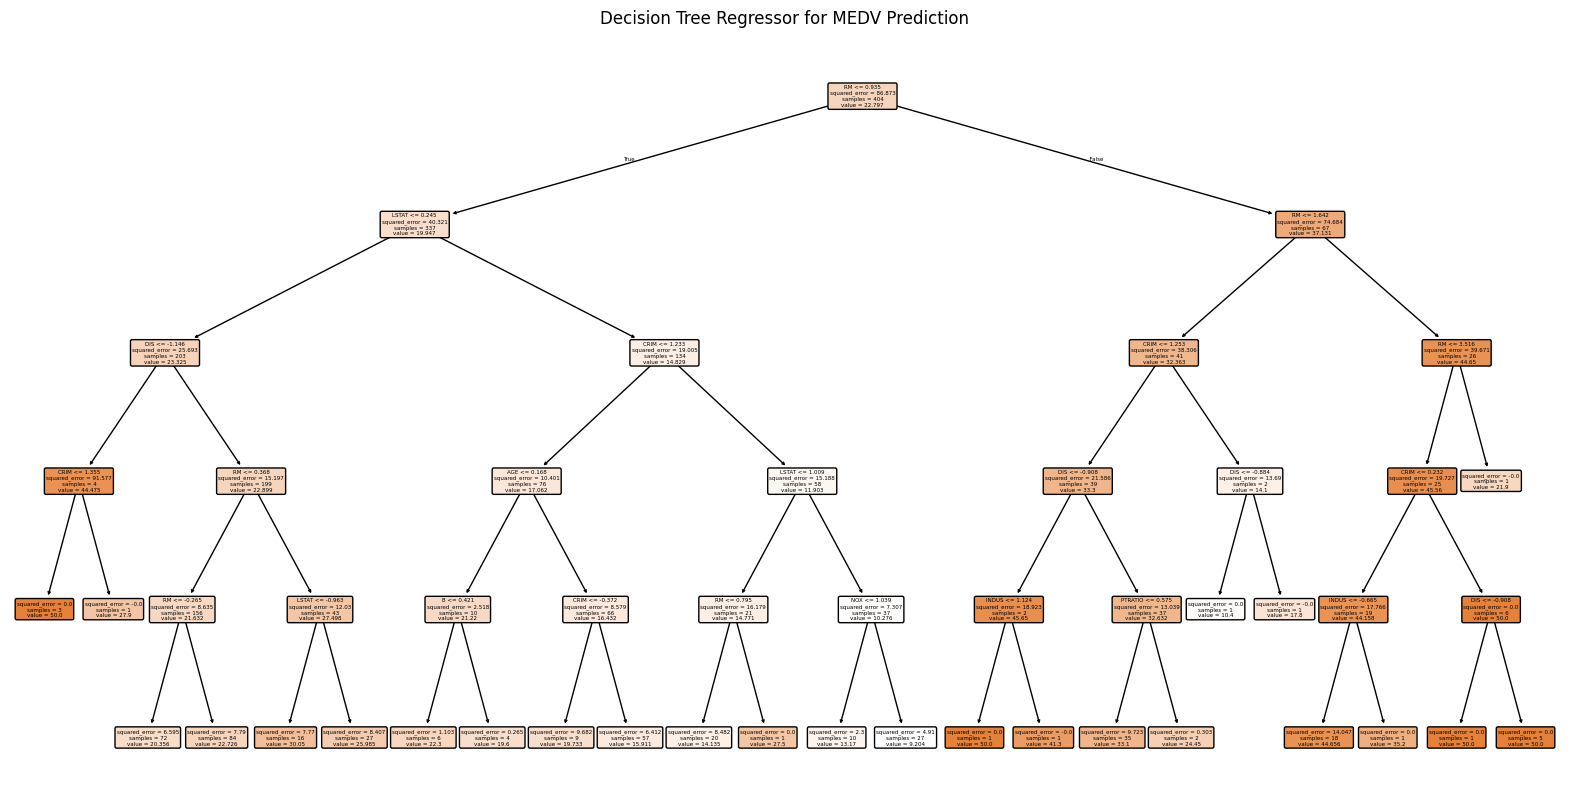

In [91]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10)) 
plot_tree(dt, feature_names=X.columns, filled=True, rounded=True, max_depth=5)
plt.title("Decision Tree Regressor for MEDV Prediction")
plt.show()

In [92]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gridd = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='r2')
gridd.fit(X_train, y_train)

print("Best params:", gridd.best_params_)
print("Best CV R2:", gridd.best_score_)

Best params: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best CV R2: 0.713896019206383


In [93]:
dt2 = DecisionTreeRegressor(random_state=42, max_depth=5, min_samples_leaf = 2, min_samples_split = 2)
dt2.fit(X_train, y_train)

y_pred_dt2 = dt2.predict(X_test)

mse = mean_squared_error(y_test, y_pred_dt2)
r2 = r2_score(y_test, y_pred_dt2)

print("R² Score: ", r2)
print("Mean Squared Error: ", mse)

R² Score:  0.8725859780866059
Mean Squared Error:  9.343752254581482


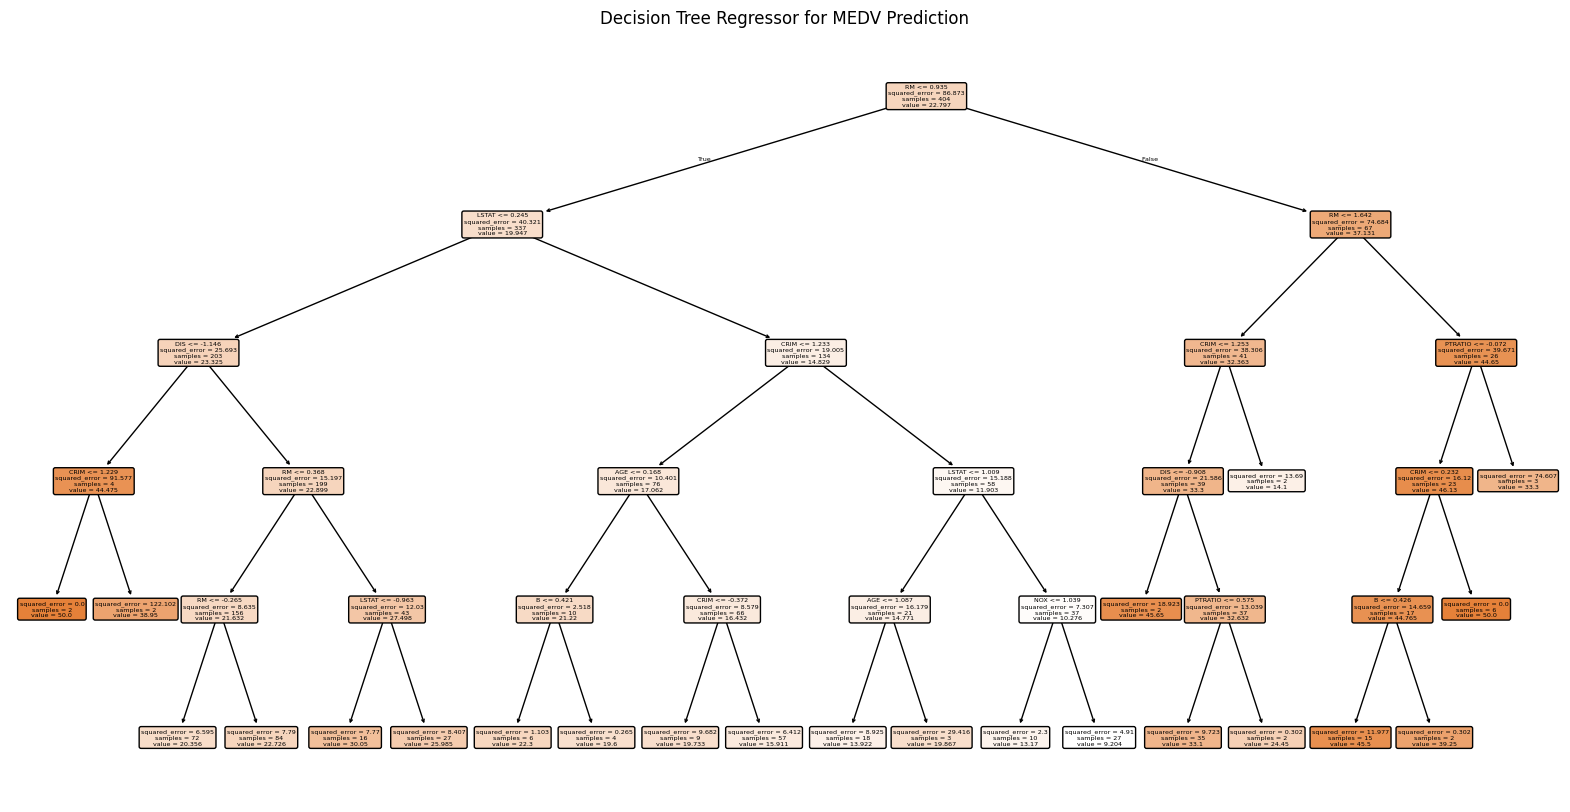

In [94]:
plt.figure(figsize=(20,10)) 
plot_tree(dt2, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree Regressor for MEDV Prediction")
plt.show()

In [96]:
import pickle

with open('house_price_prediction/decion_tree.pkl', 'wb') as f:
    pickle.dump(dt, f)

print("Decision Tree saved !!")

Decision Tree saved !!
